# Hyperfine distribution

<>:55: SyntaxWarning: invalid escape sequence '\G'
<>:55: SyntaxWarning: invalid escape sequence '\G'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\219095308.py:55: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel('Intensity ($\Gamma$/ns)')


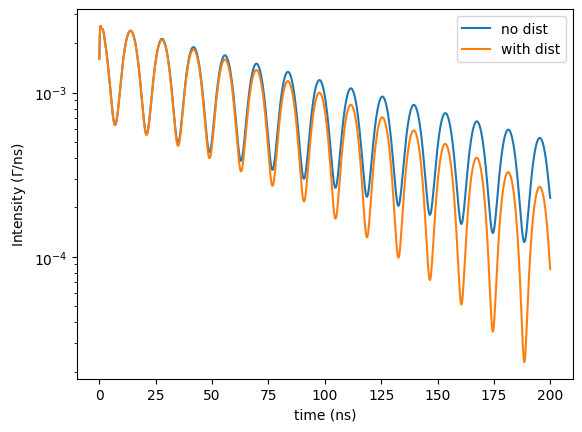

In [1]:
# import packages
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt


mat_Fe = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe",
                    material = mat_Fe,
                    thickness = 3000,  # in nanometer
                    roughness = 100,  # in nanometer
                    )

site = nx.Hyperfine(magnetic_field = 33,
                    magnetic_theta = 0
                    )

mat_Fe.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57
                    )

time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 200,
                                time_step = 0.2
                                )

time_axis, intensity = time_spectrum.Calculate()

plt.semilogy(time_axis, intensity, label = 'no dist')

# define a distribution from the library
# we have to define the number of points and the full width half maxmim for a Gaussian distribution
gauss_dist = nx.lib.distribution.Gaussian(points = 31,
                                          fwhm = 1 # this can also be a fittable Var
                                          )

# apply the distribution to the hyperfine parameter
site.SetMagneticFieldDistribution(gauss_dist)

time_axis, intensity = time_spectrum.Calculate()

# plot the results
plt.semilogy(time_axis, intensity, label = 'with dist')

plt.xlabel('time (ns)')
plt.ylabel('Intensity ($\Gamma$/ns)')

plt.legend()
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\G'
<>:8: SyntaxWarning: invalid escape sequence '\G'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\1008142218.py:8: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel('Intensity ($\Gamma$/ns)')


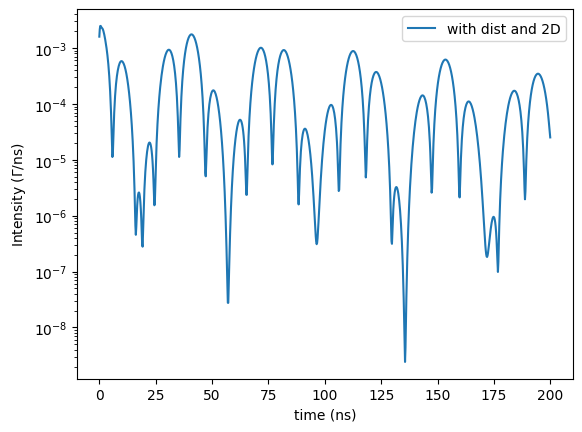

In [2]:
# create a random distribution in the magnetic field angles

site.SetRandomDistribution("mag", "2Dsp", 101)

plt.semilogy(*time_spectrum.Calculate(), label = 'with dist and 2D')

plt.xlabel('time (ns)')
plt.ylabel('Intensity ($\Gamma$/ns)')

plt.legend()
plt.show()

FWHM = 1.5


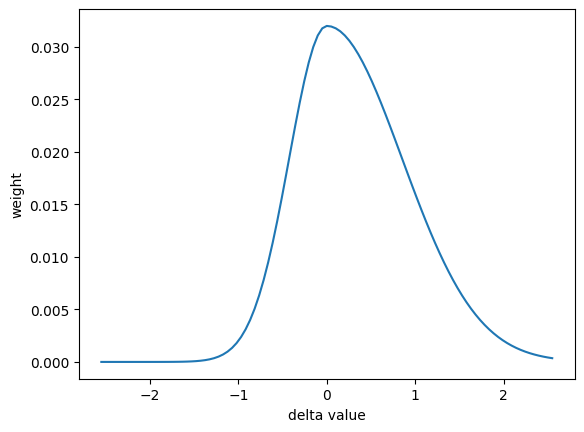

In [3]:
# define an asymmetric Gaussian distribution from the lib.distribution.
asym_gauss_dist = nx.lib.distribution.AsymmetricGaussian(points = 101,
                                                         hwhm_low = nx.Var(value = 0.5, min = 0, max = 2, fit = True),
                                                         hwhm_high = nx.Var(value = 1, min = 0, max = 2, fit = True)
                                                         )

# Call of the distribution function.
# The .delta and .weight attributes of asym_gauss_dist are set by the call.
asym_gauss_dist.DistributionFunction()

# get the full width half maximum from the set sigma value
print("FWHM = {}".format(asym_gauss_dist.GetFWHM()))

plt.plot(asym_gauss_dist.delta, asym_gauss_dist.weight)
plt.xlabel('delta value')
plt.ylabel('weight')
plt.show()

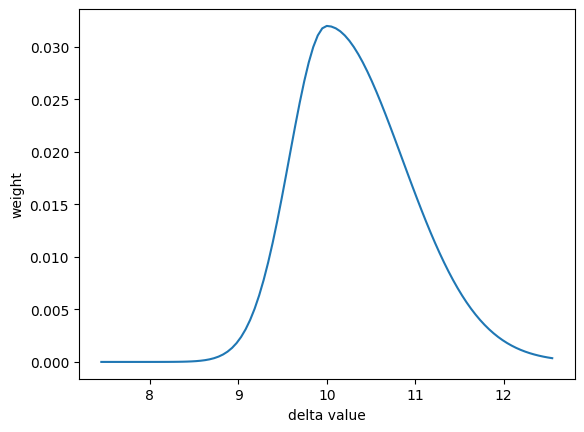

In [4]:
# define a hyperfine site
site = nx.Hyperfine(magnetic_field = 10)

# define target parameter
site.SetMagneticFieldDistribution(asym_gauss_dist)

# calc the actual distribution values
real_distribution_values = np.array(asym_gauss_dist.delta) + site.magnetic_field.value

plt.plot(real_distribution_values, asym_gauss_dist.weight)
plt.xlabel('delta value')
plt.ylabel('weight')
plt.show()

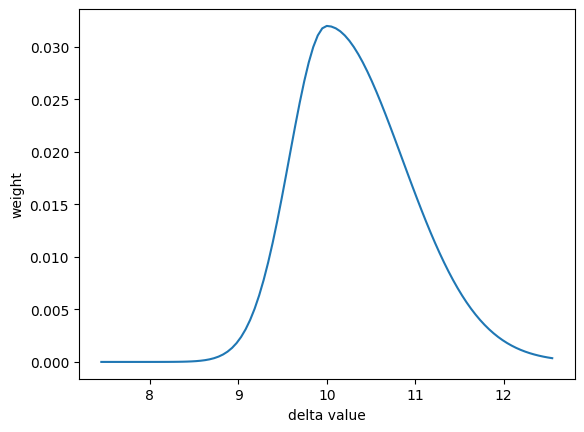

In [5]:
magnetic_distribution_values, weight = site.GetMagneticFieldDistribution()

plt.plot(magnetic_distribution_values, weight)
plt.xlabel('delta value')
plt.ylabel('weight')
plt.show()

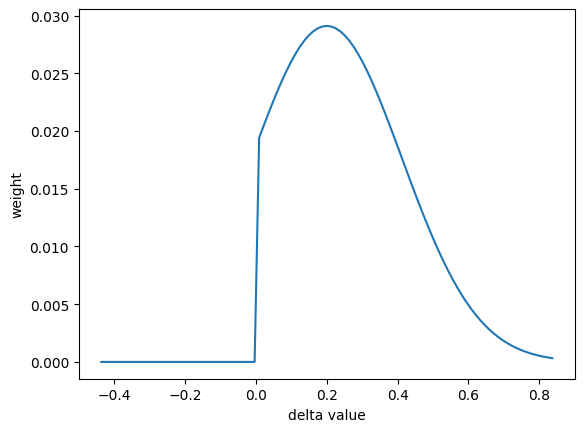

In [6]:
site = nx.Hyperfine(quadrupole = 0.2)

# define a asymmetric Gaussian distribution object from nexus.lib.distribution.
dist = nx.lib.distribution.PosGaussian(points = 101,
                                       fwhm = nx.Var(0.5, min = 0, max = 2, fit = True),
                                       target_var = site.quadrupole
                                       )

site.SetQuadrupoleDistribution(dist)

values, weight = site.GetQuadrupoleDistribution()

plt.plot(values, weight)
plt.xlabel('delta value')
plt.ylabel('weight')
plt.show()

<>:43: SyntaxWarning: invalid escape sequence '\G'
<>:56: SyntaxWarning: invalid escape sequence '\G'
<>:43: SyntaxWarning: invalid escape sequence '\G'
<>:56: SyntaxWarning: invalid escape sequence '\G'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\3538968695.py:43: SyntaxWarning: invalid escape sequence '\G'
  axs[0,0].set_ylabel('Intensity ($\Gamma$/ns)')
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\3538968695.py:56: SyntaxWarning: invalid escape sequence '\G'
  axs[1,0].set_ylabel('Intensity ($\Gamma$/ns)')
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\3538968695.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


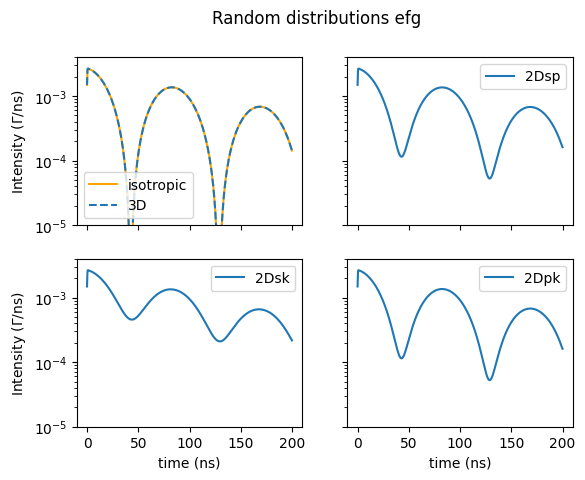

In [7]:
mat_Fe = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe",
                    material = mat_Fe,
                    thickness = 3000,  # in nanometer
                    roughness = 100,  # in nanometer
                    )

site = nx.Hyperfine(quadrupole = 1.0,
                    #quadrupole_asymmetry = 0.4
                    )

mat_Fe.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57
                    )

time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 200,
                                time_step = 0.2,
                                max_detuning = 0)

fig, axs = plt.subplots(2,2, sharex=True, sharey=True)
fig.suptitle('Random distributions efg')

site.isotropic = True

axs[0,0].semilogy(*time_spectrum.Calculate(), label = 'isotropic', color = 'orange')

site.isotropic = False

site.SetRandomDistribution("efg", "3D")

axs[0,0].semilogy(*time_spectrum.Calculate(), label = '3D', linestyle='dashed')
axs[0,0].legend()
axs[0,0].set_ylabel('Intensity ($\Gamma$/ns)')
axs[0,0].set_ylim([1e-5, 4e-3])

site.SetRandomDistribution("efg", "2Dsp")

axs[0,1].semilogy(*time_spectrum.Calculate(), label = '2Dsp')
axs[0,1].legend()

site.SetRandomDistribution("efg", "2Dsk")

axs[1,0].semilogy(*time_spectrum.Calculate(), label = '2Dsk')
axs[1,0].legend()
axs[1,0].set_xlabel('time (ns)')
axs[1,0].set_ylabel('Intensity ($\Gamma$/ns)')

site.SetRandomDistribution("efg", "2Dpk")

axs[1,1].semilogy(*time_spectrum.Calculate(), label = '2Dpk')
axs[1,1].legend()
axs[1,1].set_xlabel('time (ns)')

fig.show()

<>:39: SyntaxWarning: invalid escape sequence '\G'
<>:51: SyntaxWarning: invalid escape sequence '\G'
<>:39: SyntaxWarning: invalid escape sequence '\G'
<>:51: SyntaxWarning: invalid escape sequence '\G'
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\2022885290.py:39: SyntaxWarning: invalid escape sequence '\G'
  axs[0,0].set_ylabel('Intensity ($\Gamma$/ns)')
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\2022885290.py:51: SyntaxWarning: invalid escape sequence '\G'
  axs[1,0].set_ylabel('Intensity ($\Gamma$/ns)')
C:\Users\lbocklag\AppData\Local\Temp\ipykernel_24436\2022885290.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


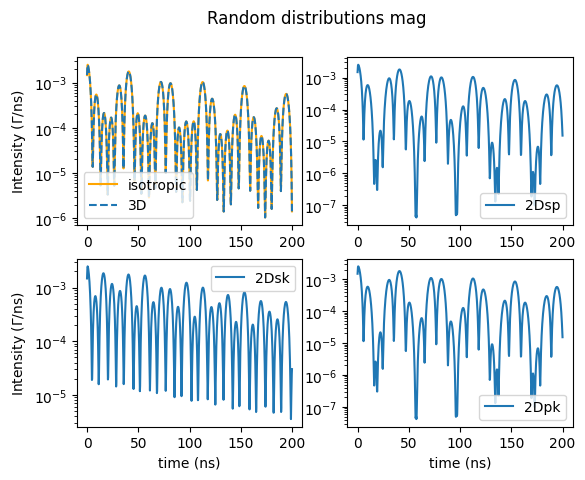

In [8]:
mat_Fe = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe",
                    material = mat_Fe,
                    thickness = 3000,  # in nanometer
                    roughness = 100,  # in nanometer
                    )

site = nx.Hyperfine(magnetic_field = 33)

mat_Fe.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.moessbauer.Fe57)

time_spectrum = nx.TimeSpectrum(experiment = exp,
                                time_length = 200,
                                time_step = 0.2,
                                max_detuning = 0)

fig, axs = plt.subplots(2,2)
fig.suptitle('Random distributions mag')

site.isotropic = True

axs[0,0].semilogy(*time_spectrum.Calculate(), label = 'isotropic', color = 'orange')

site.isotropic = False
site.SetRandomDistribution("mag", "3D")

axs[0,0].semilogy(*time_spectrum.Calculate(), label = '3D', linestyle='dashed')
axs[0,0].legend()
axs[0,0].set_ylabel('Intensity ($\Gamma$/ns)')

site.SetRandomDistribution("mag", "2Dsp")

axs[0,1].semilogy(*time_spectrum.Calculate(), label = '2Dsp')
axs[0,1].legend()

site.SetRandomDistribution("mag", "2Dsk")

axs[1,0].semilogy(*time_spectrum.Calculate(), label = '2Dsk')
axs[1,0].legend()
axs[1,0].set_xlabel('time (ns)')
axs[1,0].set_ylabel('Intensity ($\Gamma$/ns)')

site.SetRandomDistribution("mag", "2Dpk")

axs[1,1].semilogy(*time_spectrum.Calculate(), label = '2Dpk')
axs[1,1].legend()
axs[1,1].set_xlabel('time (ns)')

fig.show()

In [9]:
delta = np.linspace(-5, 5, 6)  # absolute differences to the target value
weight = np.linspace(0.1, 1, 6)  # some weight values

array_dist = nx.lib.distribution.Array(delta, weight)

site = nx.Hyperfine(magnetic_field = 30,  # distribution will range from 25 to 35
                    magnetic_theta = 90,
                    magnetic_phi = 30
                    )

site.SetMagneticFieldDistribution(array_dist)

# Print all combinations applied to the site
print(site)

# print each parameter combination due to distributions stored in site.BareHyperfines
for elem in site.BareHyperfines:
    print(elem)

Hyperfine .id: 
  .weight =               1.0
  .isomer_shift =         0.0    	 dist points: 1
  .magnetic_field =       30.0    	 dist points: 6
  .magnetic_theta =       90.0    	 dist points: 1
  .magnetic_phi =         30.0    	 dist points: 1
  .quadrupole =           0.0    	 dist points: 1
  .quadrupole_alpha =     0.0    	 dist points: 1
  .quadrupole_beta =      0.0    	 dist points: 1
  .quadrupole_gamma =     0.0    	 dist points: 1
  .quadrupole_asymmetry = 0.0    	 dist points: 1
  .lamb_moessbauer =      0.0
  .texture =              1.0
  .isotropic =            False    	 3D distribution of site in mag and efg.
  random magnetic distribution: none	 dist points: 1
  random magnetic method: model
  random quadrupole distribution: none	 dist points: 1
  random quadrupole method: model
  total number of distribution points: 6

BareHyperfine Parameters: 
  .weight = 0.030303030303030307
  .isomer_shift (mm/s) = 0.0
  .magnetic_field (T) = 25.0
  .magnetic_theta (rad) = 1.57

In [10]:
values = np.linspace(1, 30, 6)  # absolute values
weight = np.square(values)  # some dependence on values

array_dist = nx.lib.distribution.Array(values, weight)

array_dist.DistributionFunction()

site = nx.Hyperfine(magnetic_field = 0,  # zero because absolute values are assumed
                    magnetic_theta = 90,
                    magnetic_phi = 30)

site.SetMagneticFieldDistribution(array_dist)

print(site)

for elem in site.BareHyperfines:
    print(elem)

Hyperfine .id: 
  .weight =               1.0
  .isomer_shift =         0.0    	 dist points: 1
  .magnetic_field =       0.0    	 dist points: 6
  .magnetic_theta =       90.0    	 dist points: 1
  .magnetic_phi =         30.0    	 dist points: 1
  .quadrupole =           0.0    	 dist points: 1
  .quadrupole_alpha =     0.0    	 dist points: 1
  .quadrupole_beta =      0.0    	 dist points: 1
  .quadrupole_gamma =     0.0    	 dist points: 1
  .quadrupole_asymmetry = 0.0    	 dist points: 1
  .lamb_moessbauer =      0.0
  .texture =              1.0
  .isotropic =            False    	 3D distribution of site in mag and efg.
  random magnetic distribution: none	 dist points: 1
  random magnetic method: model
  random quadrupole distribution: none	 dist points: 1
  random quadrupole method: model
  total number of distribution points: 6

BareHyperfine Parameters: 
  .weight = 0.0004925623091321052
  .isomer_shift (mm/s) = 0.0
  .magnetic_field (T) = 1.0
  .magnetic_theta (rad) = 1.570

In [11]:
# load a Distribution from a file
file_dist = nx.lib.distribution.File("distribution.txt")

site = nx.Hyperfine(magnetic_field = 0,  # zero because absolute field values are given
                    magnetic_theta = 90,
                    magnetic_phi = 30
                    )

site.SetMagneticFieldDistribution(file_dist)

for elem in site.BareHyperfines:
    print(elem)

BareHyperfine Parameters: 
  .weight = 0.15
  .isomer_shift (mm/s) = 0.0
  .magnetic_field (T) = 31.2
  .magnetic_theta (rad) = 1.5707963267948966
  .magnetic_phi (rad) = 0.5235987755982988
  .quadrupole (mm/s) = 0.0
  .quadrupole_alpha (rad) = 0.0
  .quadrupole_beta (rad) = 0.0
  .quadrupole_gamma (rad) = 0.0
  .quadrupole_asymmetry = 0.0
  .texture = 1.0
  .lamb_moessbauer = 0.0
  .isotropic = False

BareHyperfine Parameters: 
  .weight = 0.25
  .isomer_shift (mm/s) = 0.0
  .magnetic_field (T) = 32.2
  .magnetic_theta (rad) = 1.5707963267948966
  .magnetic_phi (rad) = 0.5235987755982988
  .quadrupole (mm/s) = 0.0
  .quadrupole_alpha (rad) = 0.0
  .quadrupole_beta (rad) = 0.0
  .quadrupole_gamma (rad) = 0.0
  .quadrupole_asymmetry = 0.0
  .texture = 1.0
  .lamb_moessbauer = 0.0
  .isotropic = False

BareHyperfine Parameters: 
  .weight = 0.4
  .isomer_shift (mm/s) = 0.0
  .magnetic_field (T) = 33.2
  .magnetic_theta (rad) = 1.5707963267948966
  .magnetic_phi (rad) = 0.5235987755982988